# Sprint セグメンテーション1

## 1.このSprintについて

**Sprintの目的**

- コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

**どのように学ぶか**

公開されている実装を用いてKaggleコンペティションのデータでセグメンテーションを行います。

## 2.セグメンテーション

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。


[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)


セグメンテーション手法としてU-Net[1]を使います。


[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)



In [ ]:
!pip install kaggle

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/Term_Sprint19_segmentation1')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Term_Sprint19_segmentation1


In [ ]:
!mkdir /root/.kaggle/

In [ ]:
import json

token = {"username":"削除済み","key":"削除済み"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# 権限の変更
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        103           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        210           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        497           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3411           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      27424            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       7044            True  
connectx

In [ ]:
# データセットをダウンロードする
!kaggle competitions download -c tgs-salt-identification-challenge

 95% 205M/217M [00:02<00:00, 134MB/s]
100% 217M/217M [00:02<00:00, 104MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 36.9MB/s]
 90% 34.0M/37.9M [00:00<00:00, 53.9MB/s]
100% 37.9M/37.9M [00:00<00:00, 63.5MB/s]
 80% 33.0M/41.4M [00:00<00:00, 62.9MB/s]
100% 41.4M/41.4M [00:00<00:00, 76.3MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 44.8MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 58.7MB/s]
 99% 161M/163M [00:01<00:00, 117MB/s]
100% 163M/163M [00:01<00:00, 109MB/s]


In [ ]:
!unzip train.zip -d train

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/images/d80ead8703.png  
  inflating: train/images/b012e9ebb0.png  
  inflating: train/images/d3034e7a60.png  
  inflating: train/images/ae2ef70d51.png  
  inflating: train/images/1af44a9db0.png  
  inflating: train/images/41cfd4b320.png  
  inflating: train/images/853e89d0d3.png  
  inflating: train/images/2a484baa26.png  
  inflating: train/images/92e617896e.png  
  inflating: train/images/b70f0ab0c2.png  
  inflating: train/images/e8757626a1.png  
  inflating: train/images/6a3d92ce59.png  
  inflating: train/images/127ef4105f.png  
  inflating: train/images/d21012f5c1.png  
  inflating: train/images/1cb9549d2c.png  
  inflating: train/images/e030bdae65.png  
  inflating: train/images/0cf7155eb6.png  
  inflating: train/images/badb3ea766.png  
  inflating: train/images/9bd58061d6.png  
  inflating: train/images/2b1e71c2a3.png  
  inflating: train/images/28d42de29f.png  
  inflating: train/images/10833853b3.png  
  inflating: train/ima

In [ ]:
!unzip test.zip -d test

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: test/images/a3df74dd31.png  
  inflating: test/images/187ecc32d5.png  
  inflating: test/images/54538419f5.png  
  inflating: test/images/93614d4b95.png  
  inflating: test/images/50a91adce8.png  
  inflating: test/images/97d23cea10.png  
  inflating: test/images/ca04c19c0b.png  
  inflating: test/images/d168218bac.png  
  inflating: test/images/a670e833a4.png  
  inflating: test/images/a964a0f499.png  
  inflating: test/images/371bf59030.png  
  inflating: test/images/fc74f77bae.png  
  inflating: test/images/f63dc1e3be.png  
  inflating: test/images/b807539a5f.png  
  inflating: test/images/1dfcbf4bca.png  
  inflating: test/images/a971d2ae53.png  
  inflating: test/images/4ad823e2d3.png  
  inflating: test/images/85a9687a4f.png  
  inflating: test/images/da5b430ecd.png  
  inflating: test/images/b1a2903d1c.png  
  inflating: test/images/70958cacd4.png  
  inflating: test/images/2093e5c98e.png  
  inflating: test/images/f2c108fd0b.png  
  

## 【問題1】学習・推定

以下のKeras実装を使用して学習・推定を行ってください。


[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)


**《GPU環境での学習》**


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


**《新たなデータセットの適用》**


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [24]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (253/253), done.


In [75]:
# カレントディレクトリの変更

os.chdir('/content/drive/My Drive/Term_Sprint19_segmentation1/unet')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Term_Sprint19_segmentation1/unet


In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 27kB/s 
     |████████████████████████████████| 3.8MB 30.8MB/s 
     |████████████████████████████████| 512kB 13.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=42507f3429d71005a68417a6fced9eb15d7981db43c751fe3250431320e52ac7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [ ]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 8.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import tensorflow

In [79]:
tensorflow.__version__

'1.15.0'

**trainUnet.ipynbを参照し、学習・推定を行う**

In [26]:
from model import *
from data import *

In [ ]:
# 学習

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'../train','images','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=5,callbacks=[model_checkpoint])

/content/drive/My Drive/Term_Sprint19_segmentation1/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
200/200 [==============================] - 2720s 14s/step - loss: 0.6052 - acc: 0.7449

Epoch 00001: loss improved from inf to 0.60516, saving model to unet_membrane.hdf5
Epoch 2/5
200/200 [==============================] - 2716s 14s/step - loss: 0.5736 - acc: 0.7351

Epoch 00002: loss improved from 0.60516 to 0.57361, saving model to unet_membrane.hdf5
Epoch 3/5
200/200 [==============================] - 2710s 14s/step - loss: 0.5138 - acc: 0.7468

Epoch 00003: loss improved from 0.57361 to 0.51382, saving model to unet_membrane.hdf5
Epoch 4/5
200/200 [==============================] - 2677s 13s/step - loss: 0.4664 - acc: 0.7829

Epoch 00004: loss improved from 0.51382 to 0.46636, saving model to unet_membrane.hdf5
Epoch 5/5
200/200 [==============================] - 2668s 13s/step - loss: 0.4469 - acc: 0.7963

Epoch 00005: loss improved from 0.46636 to 0.44688, saving model to unet_membrane.

In [88]:
# 推定

testGene = testGenerator("../test/images")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("../test/images",results)

/content/drive/My Drive/Term_Sprint19_segmentation1/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


TypeError: ignored

**main.pyの学習と推定部分を分割してやる方式は上のようなエラーが出て、「def testGenerator」やテストフォルダのファイル名等を書き換えても解消できなかった。以下の点において書き換えを行ったうえ、main.py全体で動かしてみたところ、うまく学習・推定ができた。ただ、時間の関係上steps_per_epoch=5,epochs=1にしたため、最終的には白ではなく、グレーもしくは黒のpredict画像が出力された。**

**書き換え箇所**

- main.py
 - trainGeneratorに渡すパス修正('data/membrane/train','image','label' -> '../train','images','masks')
 - testGeneratorに渡すパス修正("data/membrane/test" -> "../test/images")
 - saveResultに渡すパス修正("data/membrane/test" -> "../test/images")

- model.py
  - input_size修正(input_size = (256,256,1) -> (None,None,1)

- data.py
 - testGeneratorのfor i in range(num_image) → glob.globでリスト取得



              img_list = glob.glob(test_path + '/*' + '.png')

              def testGenerator(test_path,target_size = (256,256),flag_multi_class = False,as_gray = True):

                  for img_title in range(img_list):
          
                      img = cv2.imread(img_title, 0)


In [84]:
# カレントディレクトリの変更

os.chdir('/content/drive/My Drive/Term_Sprint19_segmentation1/unet2')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/Term_Sprint19_segmentation1/unet2


In [85]:
# 学習、推定

!python main.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/Term_Sprint19_segmentation1/unet2/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


2021-04-01 06:23:57.842409: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-04-01 06:23:57.847853: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2021-04-01 06:23:57.848103: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5611b0618bc0 initialized for platform

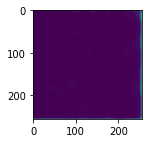

In [87]:
# 推定後の出力画像

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(2,2))
plt.imshow(mpimg.imread("../test/images/0_predict.png"))

## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

> **2 Network Architecture**

> The network architecture is illustrated in Figure 1. It consists of a contracting
path (left side) and an expansive path (right side). The contracting path follows
the typical architecture of a convolutional network. It consists of the repeated
application of two 3x3 convolutions (unpadded convolutions), each followed by
a rectified linear unit (ReLU) and a 2x2 max pooling operation with stride 2
for downsampling. At each downsampling step we double the number of feature
channels. Every step in the expansive path consists of an upsampling of the
feature map followed by a 2x2 convolution (“up-convolution”) that halves the
number of feature channels, a concatenation with the correspondingly cropped
feature map from the contracting path, and two 3x3 convolutions, each followed by a ReLU. The cropping is necessary due to the loss of border pixels in
every convolution. At the final layer a 1x1 convolution is used to map each 64-
component feature vector to the desired number of classes. In total the network
has 23 convolutional layers.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fig.1.png to Fig.1 (1).png


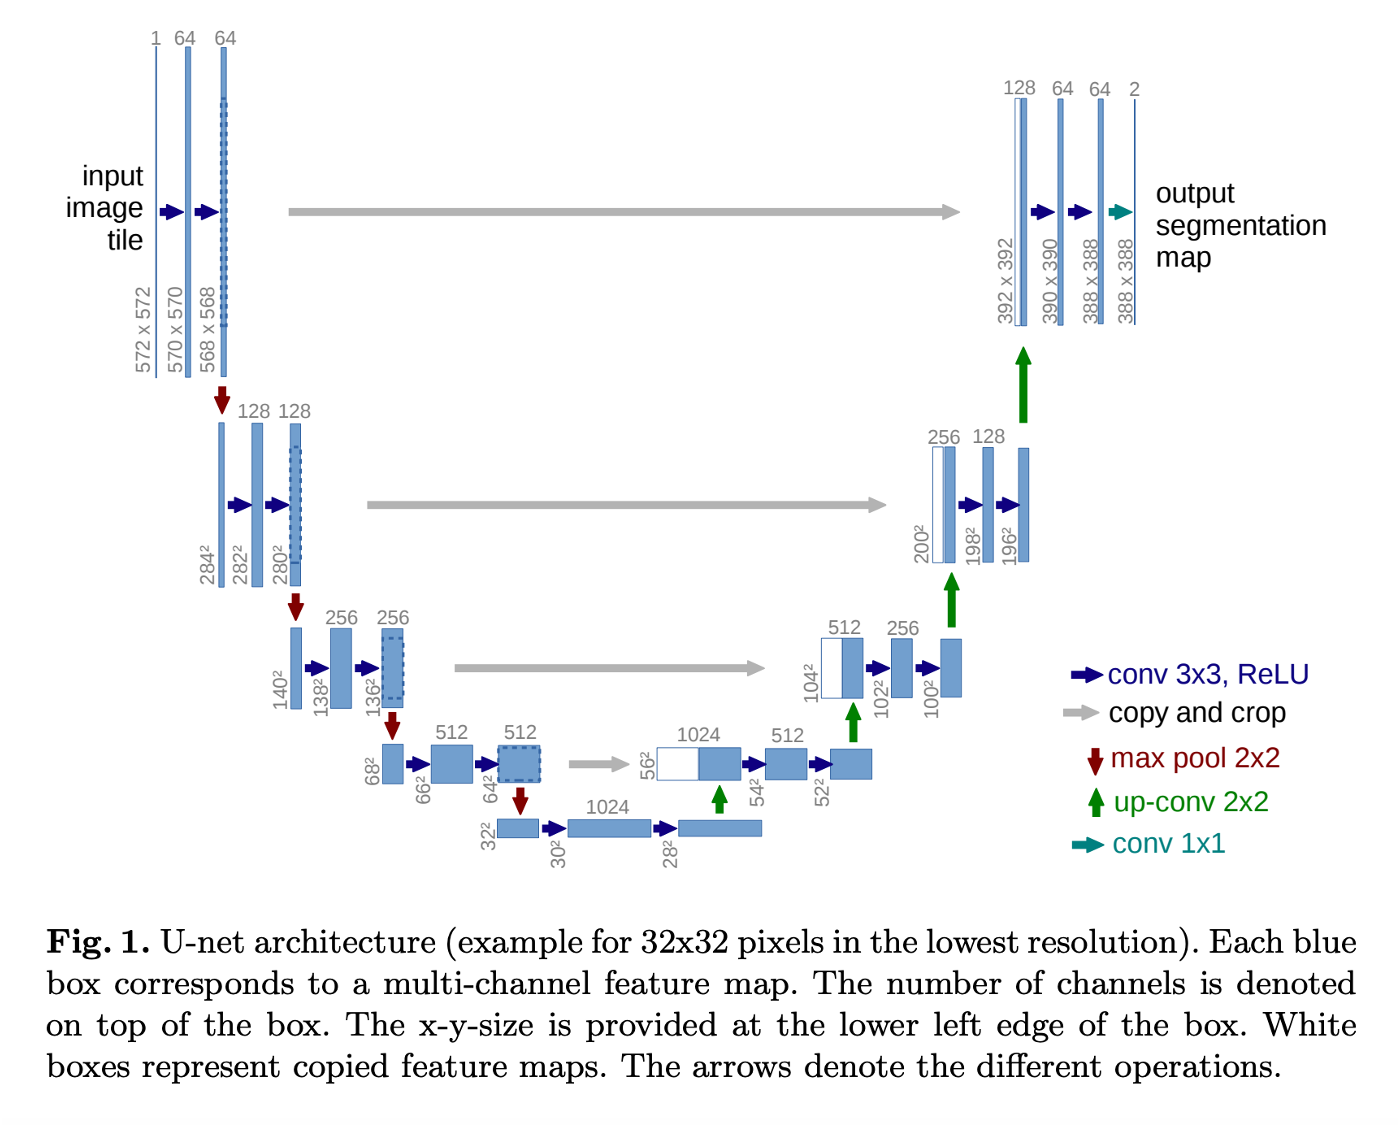

In [ ]:
from IPython.display import Image,display_png
display_png(Image('Fig.1 (1).png'))

In [ ]:
# model.py

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

"""
The network architecture is illustrated in Figure 1. It consists of a contracting path (left side) and an expansive path (right side).
ネットワーク構造:downsamplingとupsamplingが左右対称のU字型
"""
def unet(pretrained_weights = None,input_size = (256,256,1)):

    """
    <downsampling>
    It consists of the repeated application of two 3x3 convolutions (unpadded convolutions), 
    each followed by a rectified linear unit (ReLU) and a 2x2 max pooling operation with stride 2 for downsampling.
    """
    # 入力
    # downsampling（1層目）
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # downsampling（2層目）
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # downsampling（3層目）
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # downsampling（4層目）
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # downsampling（5層目）
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    """
    <upsampling>
    Every step in the expansive path consists of an upsampling of the feature map followed by a 2x2 convolution (“up-convolution”) 
    that halves the number of feature channels, a concatenation with the correspondingly cropped feature map from the contracting path, 
    and two 3x3 convolutions, each followed by a ReLU. 
    """
    # upsampling（1層目）
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3) # スキップ接続
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    # upsampling（2層目）
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3) # スキップ接続
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    # upsampling（3層目）
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3) # スキップ接続
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    # upsampling（4層目）
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3) # スキップ接続
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    # 出力
    """
    At the final layer a 1x1 convolution is used to map each 64- component feature vector to the desired number of classes. 
    """
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


- 収縮パス(downsampling)と拡張パス(upsampling)が対称的に構成されており、ダウンサンプリングにおいては画像のサイズが縦横それぞれ半分になる際にチャネルの数を倍に増やしている

- upsamplingの際は対称となるdownsamplingのパスから切り出した(cropped)画像を足し合わせている。画像を切り出す理由は、畳み込み処理の際にパディングを行わないことで画像が小さくなってしまうのが理由

- ネットワークは全部で23層の畳み込み層を持つ

(引用先)[U-Net｜DeepLearning論文の原文を読む #15](https://lib-arts.hatenablog.com/entry/paper15_U-Net)